In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
from scipy.signal import argrelextrema
from scipy.signal import find_peaks
from lmfit.models import LorentzianModel, QuadraticModel

In [2]:
max_features = 15
n_points = 640
nu = np.linspace(0,1,n_points)

In [77]:
def random_chi3():
    n_lor = np.random.randint(1,max_features)
    a = np.random.uniform(0,1,n_lor)
    w = np.random.uniform(0,1,n_lor)
    g = np.random.uniform(0.001,0.008, n_lor)
    # sorting the matrix by w
    params = np.c_[a,w,g]
    sorted_params = params[np.argsort(params[:, 1])]
    return sorted_params
# ********************************************************
def build_chi3(params):   
    chi3 = np.sum(params[:,0]/(-nu[:,np.newaxis]+params[:,1]-1j*params[:,2]),axis = 1)    
    return chi3/np.max(np.abs(chi3))  

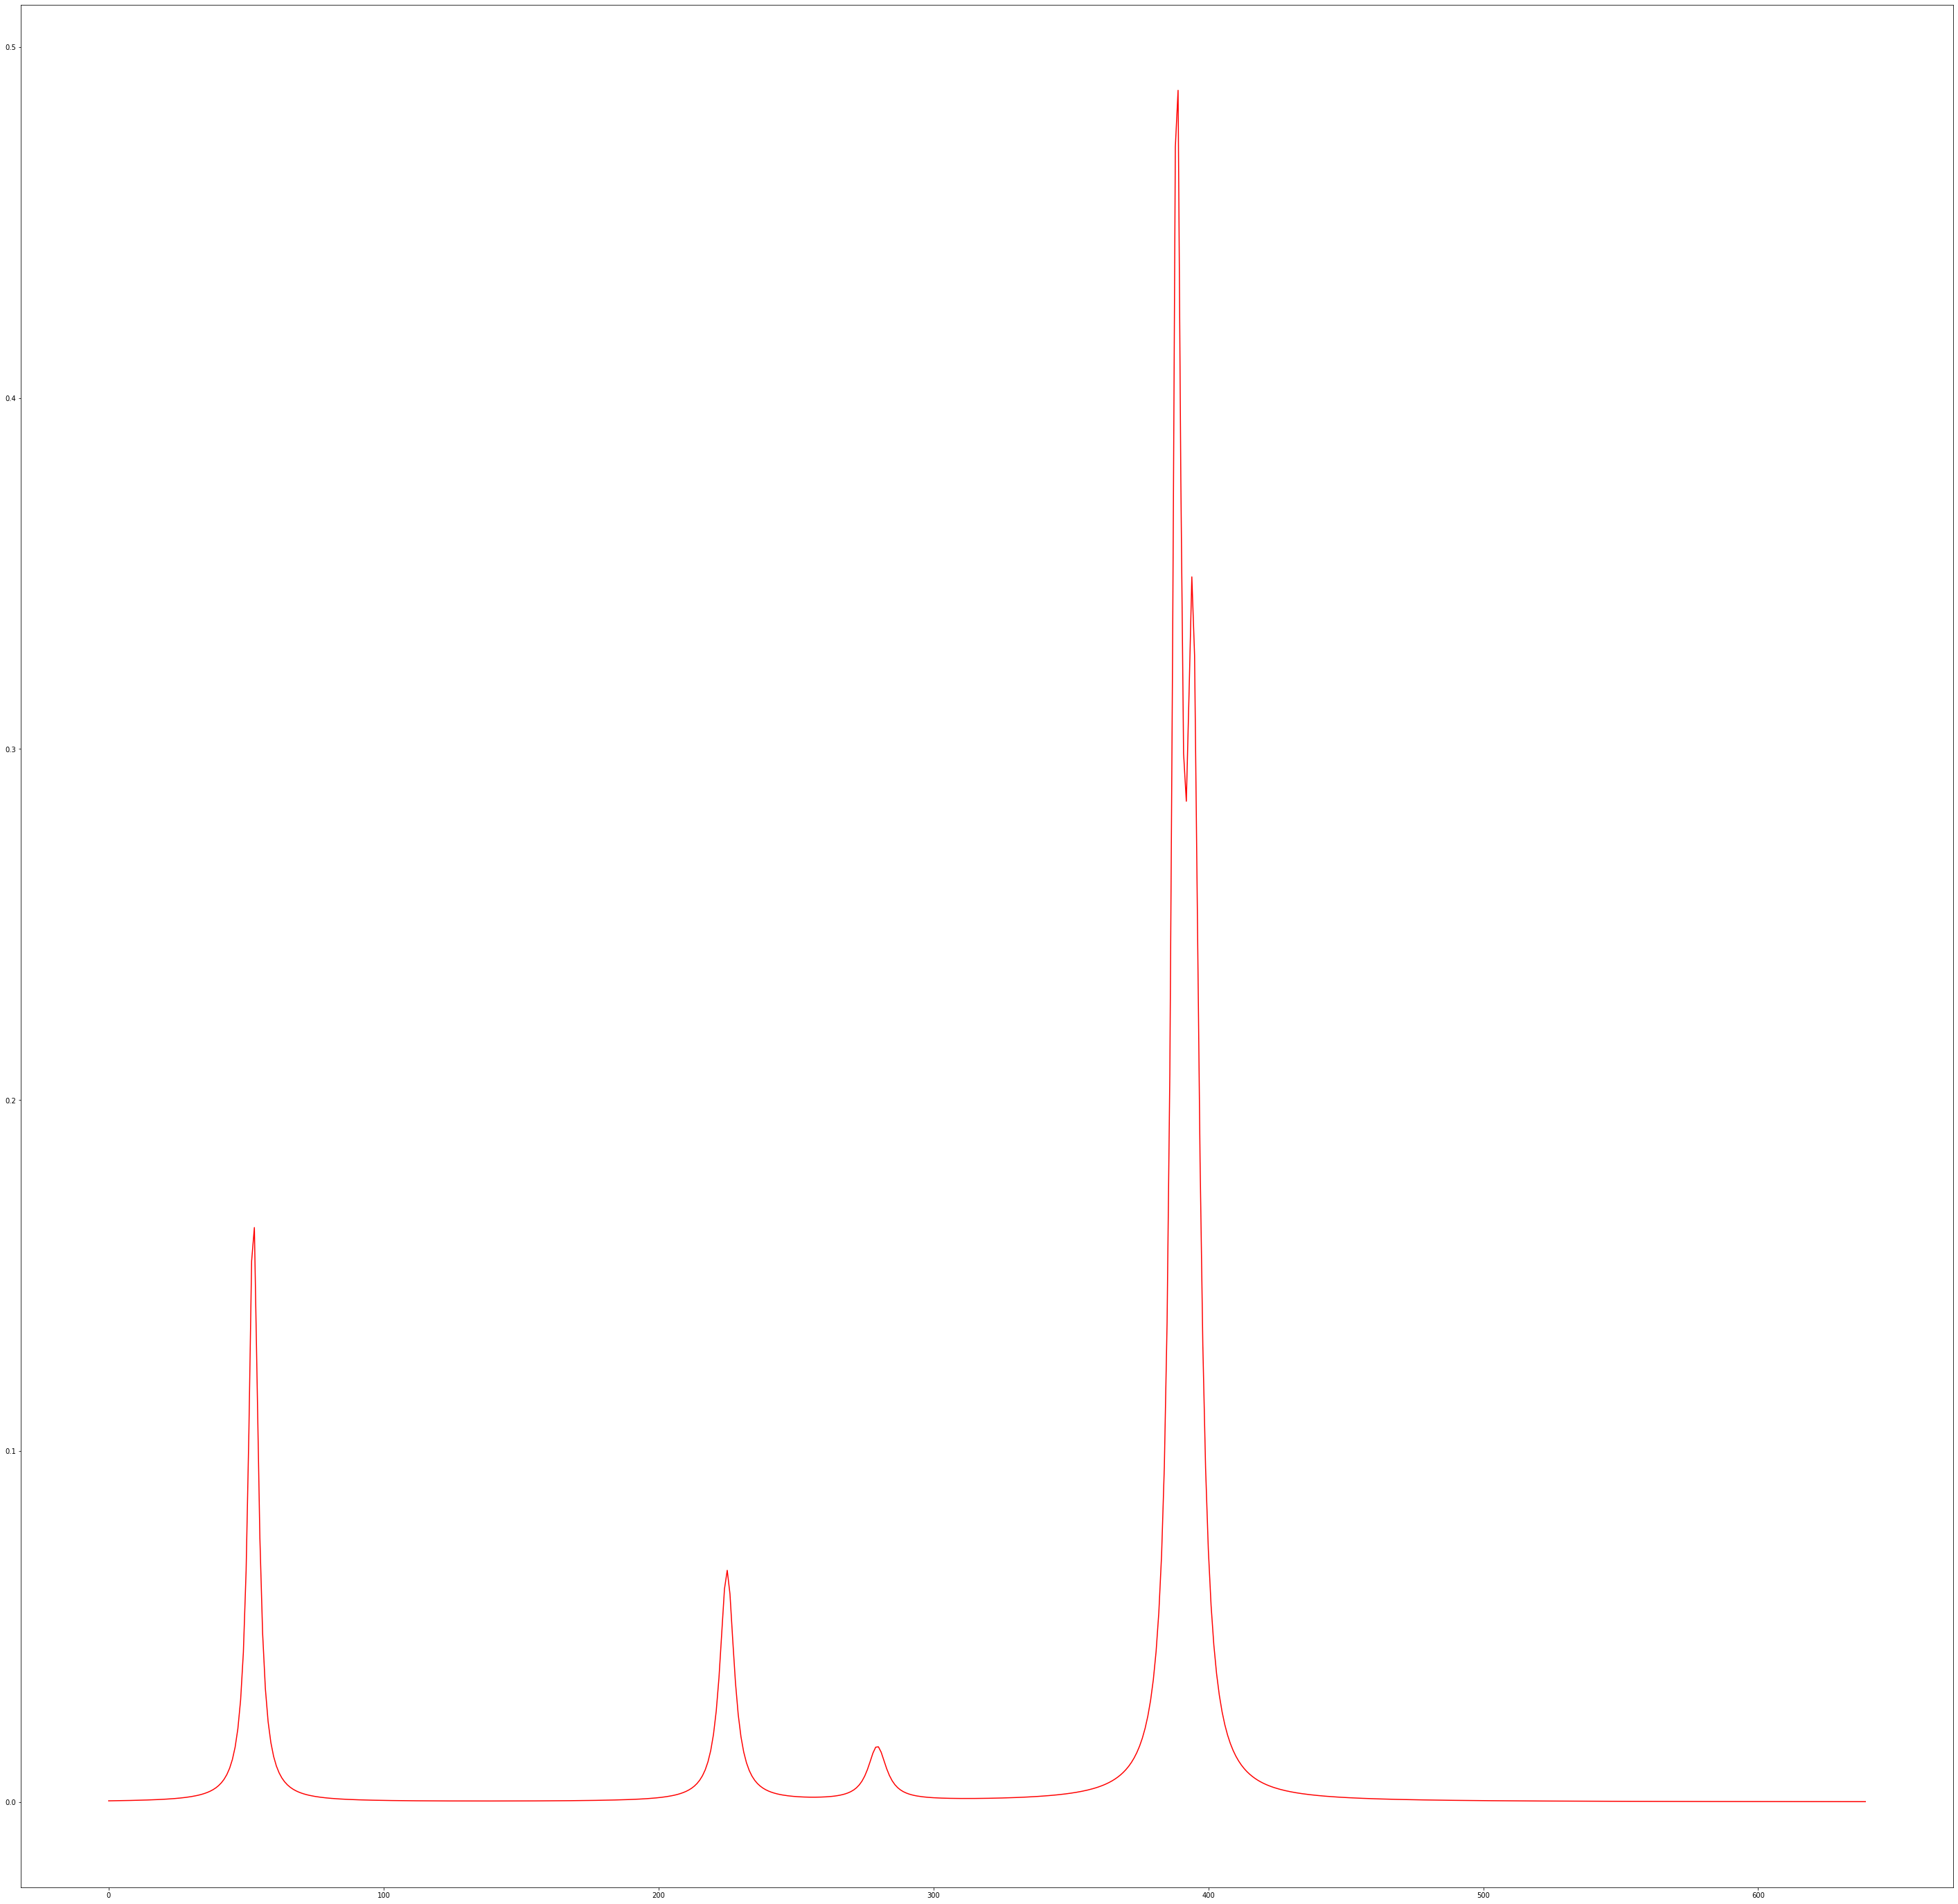

In [78]:
rdchi_3=random_chi3()
chi3 = build_chi3(rdchi_3)*np.random.uniform(0.3,1)
specter_den= chi3.imag
plt.figure(figsize=(50,50))
plt.plot(specter_den, c='r')
plt.show()

In [79]:
pics_index= find_peaks(specter_den, 0, distance=1)[0]
pics_index

array([ 53, 225, 280, 389, 394])

In [80]:
xdat = nu
ydat = specter_den
def add_peak(prefix, center, amplitude=0.005, sigma=0.05):
    peak = LorentzianModel(prefix=prefix)
    pars = peak.make_params()
    pars[prefix + 'center'].set(center)
    pars[prefix + 'amplitude'].set(amplitude)
    pars[prefix + 'sigma'].set(sigma, min=0)
    return peak, pars

model = QuadraticModel(prefix='bkg_')
params = model.make_params(a=0, b=0, c=0)
rough_peak_positions = nu[list(pics_index)]
for i, cen in enumerate(rough_peak_positions):
    peak, pars = add_peak('lz%d_' % (i+1),cen)
    model = model + peak
    params.update(pars)

init = model.eval(params, x=xdat)
result = model.fit(ydat, params, x=xdat)
comps = result.eval_components()

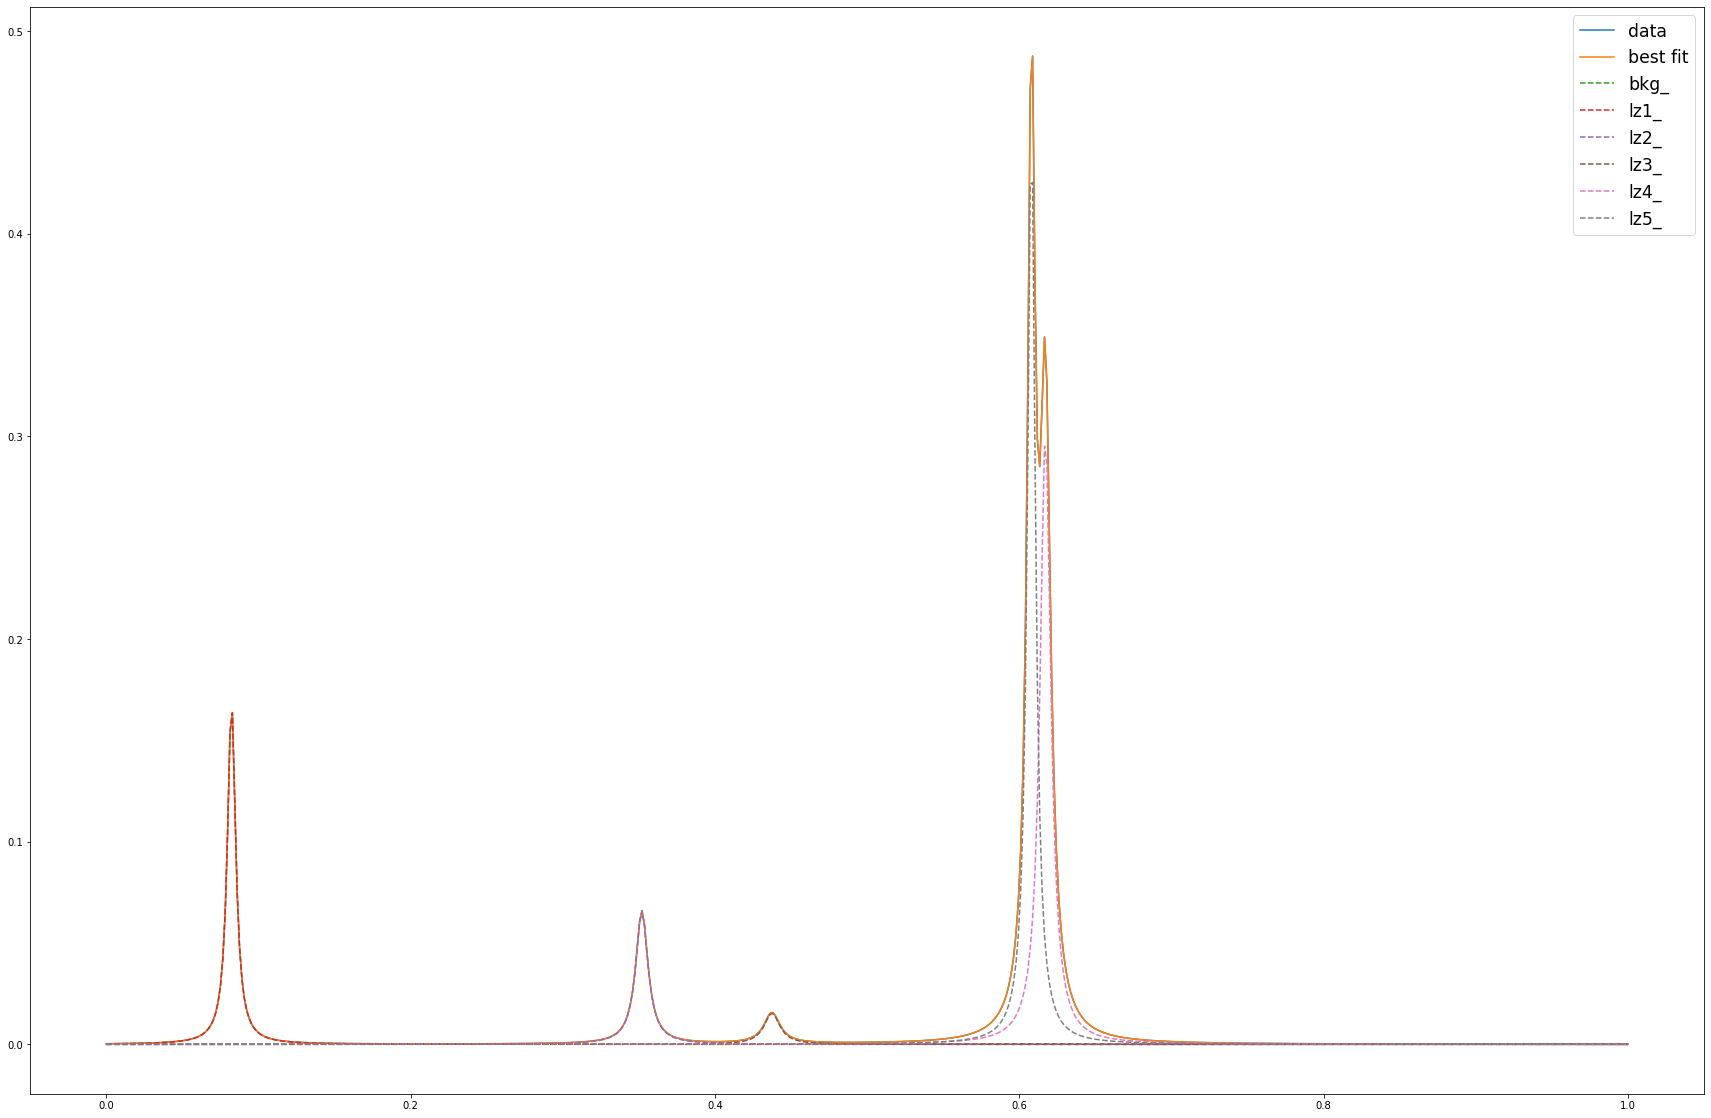

In [81]:
plt.figure(figsize=(30,20))
plt.plot(xdat, ydat, label='data')
plt.plot(xdat, result.best_fit, label='best fit')
for name, comp in comps.items():
    plt.plot(xdat, comp, '--', label=name)
plt.legend(loc='upper right', fontsize= 'xx-large')
plt.show()

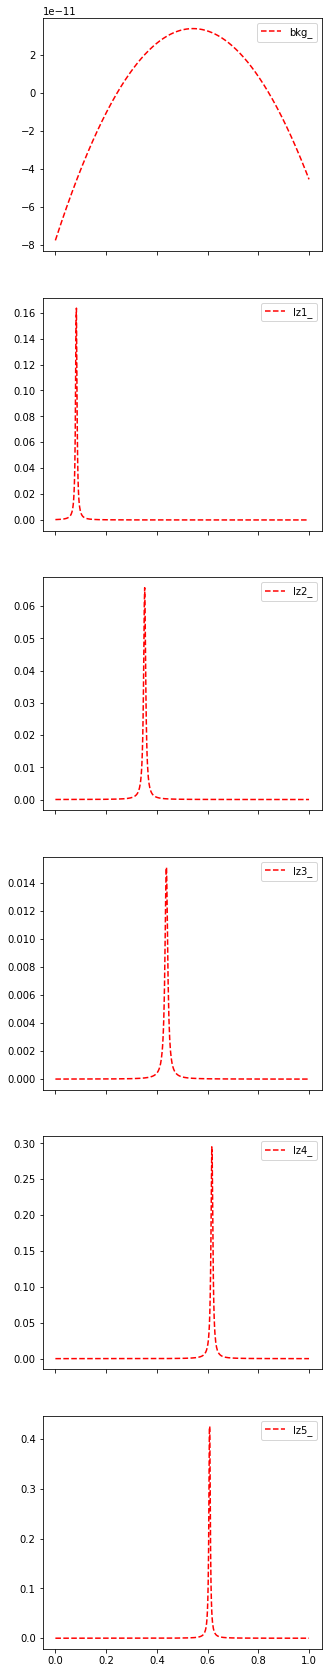

In [82]:
f, a = plt.subplots(len(comps.items()),1, sharex=True, figsize=(5,30))
i=0
for name, comp in comps.items():
    a[i].plot(xdat, comp, '--', label=name, c='r')
    a[i].legend()
    i=i+1
plt.show()

(<Figure size 1440x7200 with 2 Axes>, GridSpec(2, 1, height_ratios=[1, 4]))

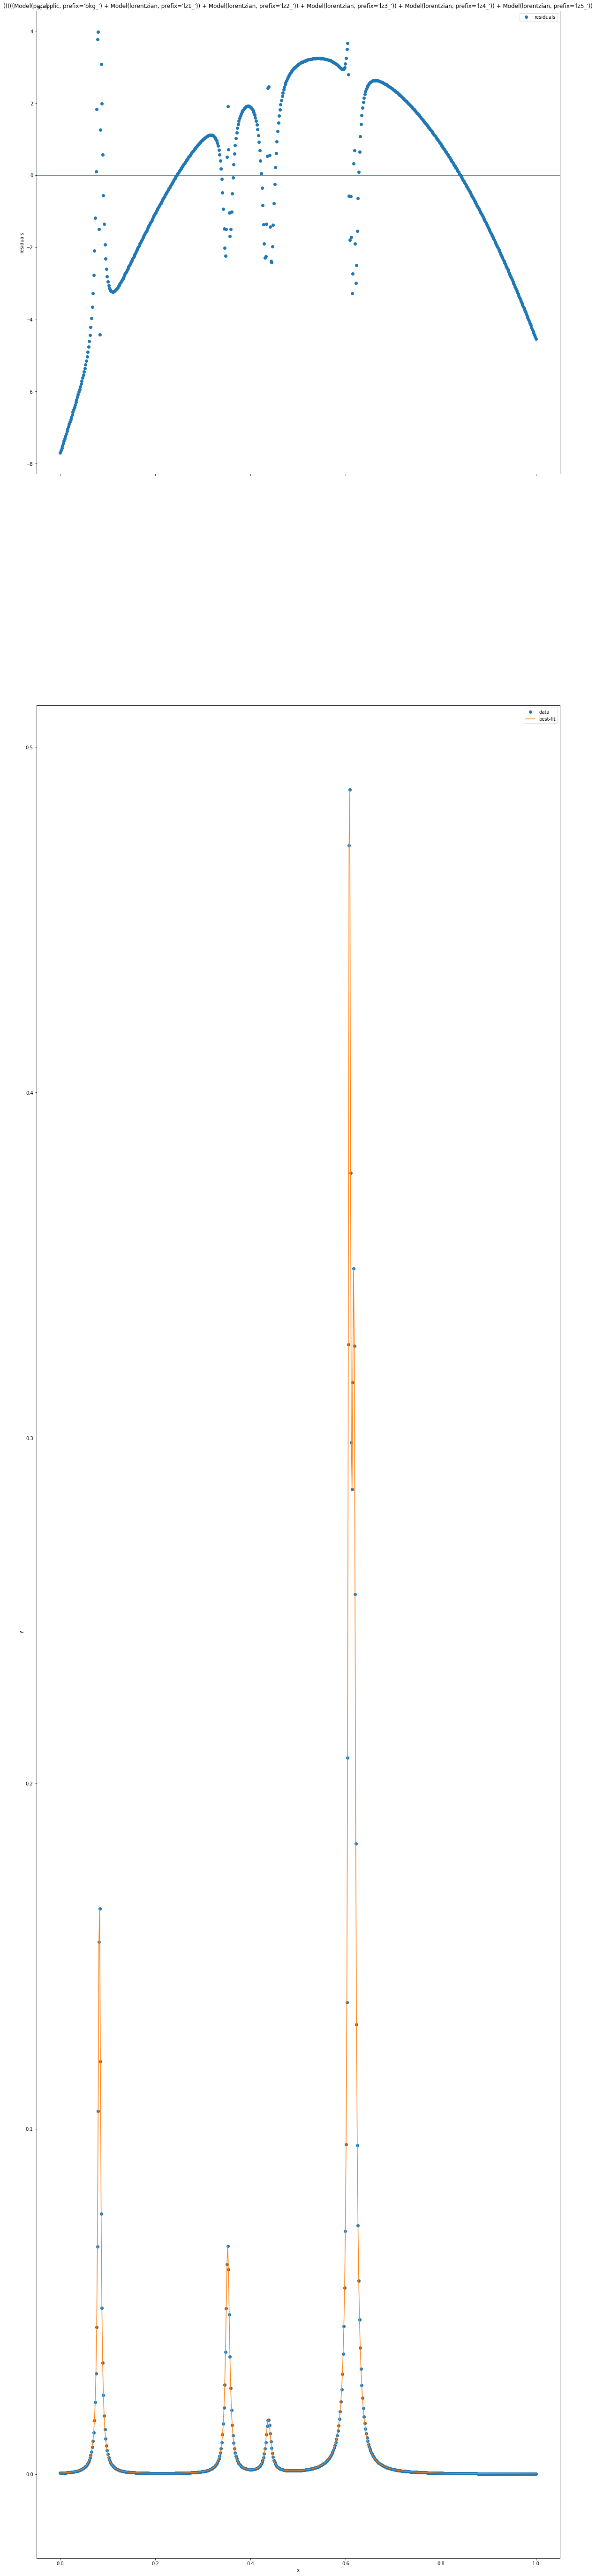

In [83]:
fig=plt.figure(figsize=(20,100))
result.plot(fig=fig)

In [84]:
parameters= result.params
parameters

Parameters([('bkg_a',
             <Parameter 'bkg_a', value=-3.787462008081411e-10 +/- 5.92e-12, bounds=[-inf:inf]>),
            ('bkg_b',
             <Parameter 'bkg_b', value=4.1085904979330987e-10 +/- 4.84e-12, bounds=[-inf:inf]>),
            ('bkg_c',
             <Parameter 'bkg_c', value=-7.748625102982852e-11 +/- 1.47e-12, bounds=[-inf:inf]>),
            ('lz1_amplitude',
             <Parameter 'lz1_amplitude', value=0.0017536802192549333 +/- 2.37e-13, bounds=[-inf:inf]>),
            ('lz1_center',
             <Parameter 'lz1_center', value=0.08238467238640788 +/- 4.25e-13, bounds=[-inf:inf]>),
            ('lz1_sigma',
             <Parameter 'lz1_sigma', value=0.0033187121425213295 +/- 6.02e-13, bounds=[0:inf]>),
            ('lz1_fwhm',
             <Parameter 'lz1_fwhm', value=0.006637424285042659 +/- 1.2e-12, bounds=[-inf:inf], expr='2.0000000*lz1_sigma'>),
            ('lz1_height',
             <Parameter 'lz1_height', value=0.16820192630473924 +/- 2.08e-11, bounds=[-inf:inf], expr='0.3183099*lz1_amplitude/max(2.220446049250313e-16, lz1_sigma)'>),
            ('lz2_amplitude',
             <Parameter 'lz2_amplitude', value=0.001016428097502603 +/- 2.71e-13, bounds=[-inf:inf]>),
            ('lz2_center',
             <Parameter 'lz2_center', value=0.35200986039670346 +/- 1.27e-12, bounds=[-inf:inf]>),
            ('lz2_sigma',
             <Parameter 'lz2_sigma', value=0.004919628619986627 +/- 1.85e-12, bounds=[0:inf]>),
            ('lz2_fwhm',
             <Parameter 'lz2_fwhm', value=0.009839257239973254 +/- 3.7e-12, bounds=[-inf:inf], expr='2.0000000*lz2_sigma'>),
            ('lz2_height',
             <Parameter 'lz2_height', value=0.06576494915872802 +/- 1.71e-11, bounds=[-inf:inf], expr='0.3183099*lz2_amplitude/max(2.220446049250313e-16, lz2_sigma)'>),
            ('lz3_amplitude',
             <Parameter 'lz3_amplitude', value=0.0003056437620609049 +/- 3.13e-13, bounds=[-inf:inf]>),
            ('lz3_center',
             <Parameter 'lz3_center', value=0.4374961058846995 +/- 6.21e-12, bounds=[-inf:inf]>),
            ('lz3_sigma',
             <Parameter 'lz3_sigma', value=0.00634999550107862 +/- 8.99e-12, bounds=[0:inf]>),
            ('lz3_fwhm',
             <Parameter 'lz3_fwhm', value=0.01269999100215724 +/- 1.8e-11, bounds=[-inf:inf], expr='2.0000000*lz3_sigma'>),
            ('lz3_height',
             <Parameter 'lz3_height', value=0.015321181774176799 +/- 1.5e-11, bounds=[-inf:inf], expr='0.3183099*lz3_amplitude/max(2.220446049250313e-16, lz3_sigma)'>),
            ('lz4_amplitude',
             <Parameter 'lz4_amplitude', value=0.004073456762169034 +/- 4.72e-13, bounds=[-inf:inf]>),
            ('lz4_center',
             <Parameter 'lz4_center', value=0.6171928566545076 +/- 3.43e-13, bounds=[-inf:inf]>),
            ('lz4_sigma',
             <Parameter 'lz4_sigma', value=0.004308474644125759 +/- 5.23e-13, bounds=[0:inf]>),
            ('lz4_fwhm',
             <Parameter 'lz4_fwhm', value=0.008616949288251519 +/- 1.05e-12, bounds=[-inf:inf], expr='2.0000000*lz4_sigma'>),
            ('lz4_height',
             <Parameter 'lz4_height', value=0.30094679015650766 +/- 1.96e-11, bounds=[-inf:inf], expr='0.3183099*lz4_amplitude/max(2.220446049250313e-16, lz4_sigma)'>),
            ('lz5_amplitude',
             <Parameter 'lz5_amplitude', value=0.00448503704268203 +/- 4.39e-13, bounds=[-inf:inf]>),
            ('lz5_center',
             <Parameter 'lz5_center', value=0.6079889666270297 +/- 1.79e-13, bounds=[-inf:inf]>),
            ('lz5_sigma',
             <Parameter 'lz5_sigma', value=0.0031675005792468625 +/- 3.2e-13, bounds=[0:inf]>),
            ('lz5_fwhm',
             <Parameter 'lz5_fwhm', value=0.006335001158493725 +/- 6.41e-13, bounds=[-inf:inf], expr='2.0000000*lz5_sigma'>),
            ('lz5_height',
             <Parameter 'lz5_height', value=0.45071236984331065 +/- 2.31e-11, bounds=[-inf:inf], expr='0.3183099*lz5_amplitude/max(2.220446049250313e-16, lz5_sigma)'>)])